In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('Value')
  if label:
    plt.legend(fontsize=10)
  plt.grid(True)

**Trend and Seasonality**

In [ ]:
def trend(time, slope=0):
  return slope*time

In [ ]:
time = np.arange(4*365+1)
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

***Upward Trend***

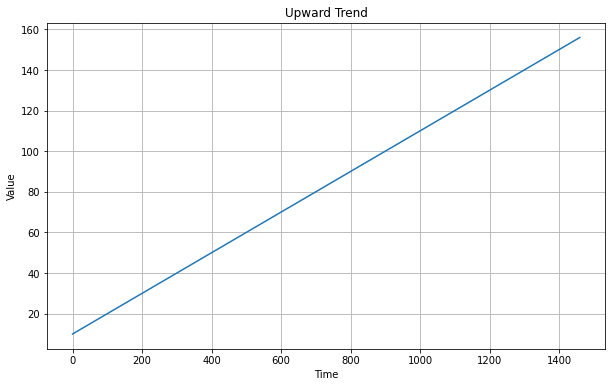

In [ ]:
baseline = 10
series = baseline + trend(time, 0.1) #0.1 = increase in trend everyday (slope)
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.title('Upward Trend')
plt.show()

In [ ]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

***Seasonal***

In [ ]:
def seasonal_pattern(season_time):
  return np.where(season_time<0.4,
                  np.cos(season_time*2*np.pi),
                  1/np.exp(3*season_time))
  
def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time+phase)%period)/period
  return amplitude*seasonal_pattern(season_time)

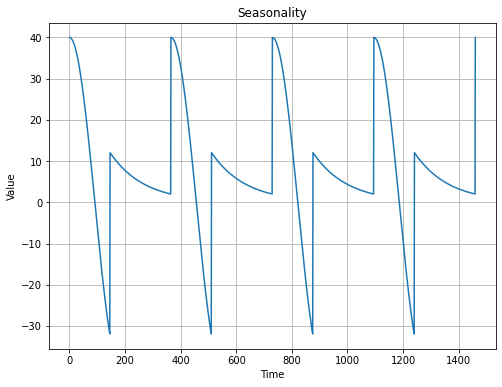

In [ ]:
amplitude=40
series = seasonality(time, period=365, amplitude=amplitude)
plt.figure(figsize=(8,6))
plot_series(time, series)
plt.title('Seasonality')
plt.show()

***Time Series with both Trend and Seasonality***

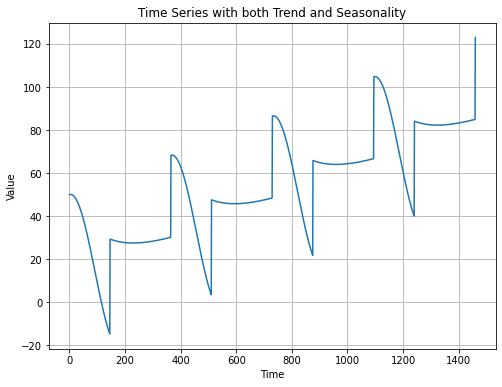

In [ ]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plt.figure(figsize=(8,6))
plot_series(time, series)
plt.title('Time Series with both Trend and Seasonality')
plt.show()

**Noise**

In [ ]:
def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

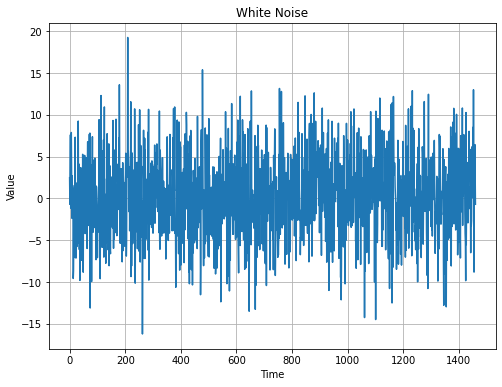

In [ ]:
noise_level=5
noise = white_noise(time, noise_level=noise_level, seed=42)
plt.figure(figsize=(8,6))
plot_series(time, noise)
plt.title('White Noise')
plt.show()

***Time series with white noise***

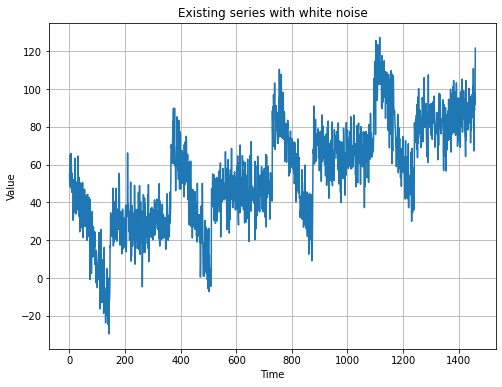

In [ ]:
series += noise #here series contains upward trend and seasonality. We are adding noise to it
plt.figure(figsize=(8,6))
plot_series(time, series)
plt.title('Existing series with white noise')
plt.show()